# Auction - Task 2 

## Assumptions
We assume that this is a fair and reasonable auction. These assumptions simply mean that the auction operates as you would expect.

# Q1) First Price Auction (FPA)
In this auction, each buyer makes one bid ("offer") to the seller. The seller sells the item to the highest bidder for that amount. 

Example of an ad auction:
<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.

Suppose that we know that all buyers draw their values either uniformly at random from the $(0,1)$ interval, or from an exponential distribution with a certain parameter $\lambda$. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? **Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$.**

Try to maximize your profit (or expected utility, as referred in **task1**), using the bidding function you derived in **task1**!

### Auction Simulator
We will begin by building a simulator for our auctions.

In [12]:
import numpy as np
import random
import matplotlib.pyplot as plt
from sympy import *
import math

In [13]:
def simulate_fpa(num_players, beta_fn, distribution, num_trials=1000):
    """
    num_players (int): The number of bidders in the auction.
    beta_fn (function): The bidding function (takes in as input the valuation
        of a bidder and returns how much the bidder bids).
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from your perspective as a player
        Entry `i` of this array will contain the total gain of utility of the
        bidder after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
        This will be plotted in Q1(a) and Q1(b).
    """
    profit_timeseries = np.zeros(num_trials,dtype=float)
    # to perform each trail
    for i in range(num_trials):
        if distribution == 'uniform':
            # generate the values of ohter bidders and my valuation respectively 
            other_bids = np.array([random.uniform(0,1) for i in range(num_players - 1)])
            my_valuation = random.uniform(0,1)
        if distribution == 'exponential':
            other_bids = np.array([np.random.exponential(0.5) for i in range(num_players - 1)])
            my_valuation = np.random.exponential(0.5)
        my_bid = beta_fn(my_valuation)
        if my_bid > max(other_bids):
            # each time add the profit to the ith to the last values in the list
            # so that it generate a list of cumulative profit  of i rounds
            for j in range (i,num_trials):
                profit_timeseries[j] += my_valuation - my_bid
    return profit_timeseries

### Q1 (a) FPA Uniform
Now, assume that everyone (including you) draws their values uniformly at random from the $(0,1)$ interval. Run a simulation for 1000 rounds with two buyers, and your optimized bidding function. Plot your cumulative profit as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n-1$ other bidders (plot with $n = 10$  (9 other bidders))? Explain the differences between these graphs.

Note: You should first mathematically derive the expected total profit over all of the trials, and then empirically verify that your answer is correct. **The optimal cumulative profit of 1000 rounds can reach about 81 for n=2 and about 2.5 for n=10. Please get the optimal solution as high as possible for full socre.**

### Our solution
As proved in Task1, bidder A’s expected utility is maximized when his bidding function is $$\beta\left(x\right)=\frac{n-1}{n}x$$ 

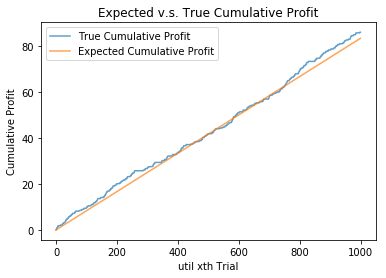

In [15]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 2 (1 other bidder)

def beta(valuation):
    #Define your bidding function for n = 2 (1 other bidder) here
    return valuation/2

X = [i for i in range(1000)]
Y = simulate_fpa(2, beta, 'uniform', num_trials=1000)
expected = [i/12 for i in range(1000)]
plt.plot(X, Y,label='True Cumulative Profit',alpha=0.7)
plt.plot(X, expected,label='Expected Cumulative Profit',alpha=0.7)
plt.xlabel('util xth Trial')
plt.ylabel('Cumulative Profit')
plt.title('Expected v.s. True Cumulative Profit')
plt.legend()
plt.show()

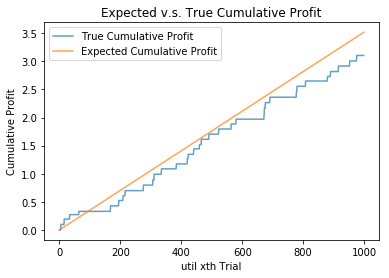

In [18]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 10 (9 other bidders)

def beta2(valuation):
    #Define your bidding function for n = 10 (9 other bidders) here
    n = 10
    return (n-1)*valuation/n

X = [i for i in range(1000)]
Y = simulate_fpa(10, beta2, 'uniform', num_trials=1000)
coefficient = 9**9/10**10/11
expected = [i*coefficient for i in range(1000)]
plt.plot(X, Y,label='True Cumulative Profit',alpha=0.7)
plt.plot(X, expected,label='Expected Cumulative Profit',alpha=0.7)
plt.xlabel('util xth Trial')
plt.ylabel('Cumulative Profit')
plt.title('Expected v.s. True Cumulative Profit')
plt.legend()
plt.show()

Comparing the above two plots, we can find that the curve of n=2 is smoother than that of n = 10. 

This agrees with our intuition, because a more rugged curve essentially results from more occurrences of “0 utility”. 

When there are more competitors bidding for one item, the probability of my success will decrease, which will lead to more non-increasing portions in the curve.


### Q1 (b) FPA Exponential
Now assume that everyone (including you) draws their values from the exponential distribution with parameter $\lambda = 2$. **Assuming everyone else is still bidding their valuation**, how good of a bidding function can you empirically create for bidding against 9 other people ($n = 10$), who all bid their valuations? Note that it is not necessary to find a closed-form solution. Just play around with different bidding functions and try to find the best one you can! You should explain why you choose your final bidding function here.

In order to receive the full score, we are expecting the total profit for 1000 trials with 9 other people and the exponential distribution with $\lambda = 2$ to be above 25.

**The optimal cumulative profit of 1000 rounds can reach about 24. Please get the optimal solution as high as possible for full socre.**

### Our Solution
Now assume that everyone else and bidder A draw the valuations from the exponential distribution with parameter $𝜆 = 2$. Knowing that everyone else continues to bid their valuation, bidder A’s aim is to empirically find a bidding function to compete against $n-1$ other bidders. 

Similar in question(a), we denote the valuations (as well as the bids) of the other n-1 bidders as $ Y_1,{\ Y}_2,\ Y_3,\ldots,\ {\ Y}_{n-1}$, which are independent and identically distributed random variables. Let $Y_{max}$ represent the highest bid among bidder A’s competitors’ bids.

His utility and its expected value are given by
   
$$B=\begin{cases}0,& y_{max}>β(x) \\
x-β\ x,&y_{max}≤β(x)\end{cases}$$

$$E\left(B\right)=\left(x-\beta\left(x\right)\right)\times{(F_Y(\beta\left(x\right)))}^{n-1} = \left(x-\beta\left(x\right)\right)\left(1-e^{-2\beta\left(x\right)}\right)^{n-1}$$

Take the derivative of $E\left(B\right)$ in terms of $\beta\left(x\right)$ where we treat $\beta\left(x\right)$ as an independent variable and x as a constant, and let the derived function equals to zero:

$$E^\prime\left(B\right)=e^{-2\beta\left(x\right)}\left(2nx-2n\beta\left(x\right)-2x+2\beta\left(x\right)+1\right)-1=0$$

$$\beta\left(x\right)=\frac{2bn-2b\ +1\ -\ \left(n-1\right)\ LambertW(\ \frac{e^\frac{2bn-2b+1}{n-1}}{n-1}\ )}{2n-2}$$


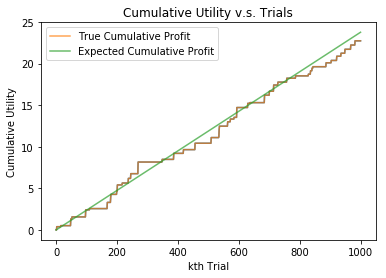

In [7]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line

def beta3(your_valuation): 
    b = your_valuation
    n = 10
    return (2*b*(n-1)-LambertW(exp((2*b*(n-1)+1)/(n-1))/(n-1))*(n-1)+1)/(2*n-2)

def expectation(k):
    return 0.023794112796477487*k

X = [i for i in range(1000)]
Y = simulate_fpa(10, beta3, 'exponential', num_trials=1000)
W = [expectation(i) for i in range(1000)]
plt.plot(X, Y)
plt.plot(X, Y,label='True Cumulative Profit',alpha=0.7)
plt.plot(X, W,label='Expected Cumulative Profit',alpha=0.7)
plt.xlabel('kth Trial')
plt.ylabel('Cumulative Utility')
plt.title('Cumulative Utility v.s. Trials')
plt.legend()
plt.show()

The following block is a supplementary explanation for how the curve of $expected\ cumulative\ profit$ is drawn in the above block.
For mathametical formulation and explanation, more details are demonstrated in our report.

In the following block, function $optimal()$ is our derived optimal bidding function and $near\_optimal()$ is a linear approximation of $optimal()$.The figure plotted by this code shows that $optimal()$ and $near\_optimal()$ are close to each other, and therefore it is reasonable to use $near\_optimal()$ to calculate the expected cumulative profit.

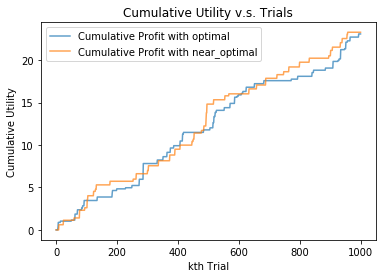

In [11]:
def optimal(your_valuation): 
    b = your_valuation
    n = 10
    return (2*b*(n-1)-LambertW(exp((2*b*(n-1)+1)/(n-1))/(n-1))*(n-1)+1)/(2*n-2)

def near_optimal(k):
    return 0.7*k

X = [i for i in range(1000)]
Y = simulate_fpa(10, beta3, 'exponential', num_trials=1000)
Z = simulate_fpa(10, near_optimal, 'exponential', num_trials=1000)
plt.plot(X, Y,label='Cumulative Profit with optimal',alpha=0.7)
plt.plot(X, Z,label='Cumulative Profit with near_optimal',alpha=0.7)
plt.xlabel('kth Trial')
plt.ylabel('Cumulative Utility')
plt.title('Cumulative Utility v.s. Trials')
plt.legend()
plt.show()

# Q2) Second Price Auction (SPA)
In this auction, each buyer again makes one secret bid. The bidder with the highest bid wins, but they only pay the second highest value.

Here is an example of a second price ad auction. Only one person gets to show the ad:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>Yes</td>
<td>\$3</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$3.

Operating under the same assumptions as in the first price option case, we assume all buyers draw their values uniformly at random from the $(0,1)$ interval. Given that you are person $i$, valuing the item at $x_i$, how much should you bid? **Suppose that everyone else is extremely risk averse, meaning that their function is $\beta_j(x_j) = x_j, \forall j \neq i$. In fact this is the optimal bidding function in the second price auction.**

Modify your simulator to work for the second-price auction case.

### Our solution:
Let’s consider such a scenario. There are totally n bidders and their corresponding bids are $b_1,{\ b}_2,\ b_3,\ldots,\ {\ b}_{n-1},\ b_n$.  

Suppose that bidder A is the $n\ th$ bidder who bids $b_n$, which is exactly his valuation of this item, and the highest bid among his competitors is $b_{max}= max\{b_1,{\ b}_2,\ b_3,\ldots,\ {\ b}_{n-1},\ b_n\}$.  

By bidding $b_n$, bidder A will win if $b_n \geq b_{max}$  (gaining a profit of $b_n−b_{max}$) and lose if  $b_n < b_{max}$ . 

Suppose that bidder A bids a value $c_n < b_n$. If $b_{max}< c_n< b_n$, then he still wins and his profit is still $b_n−b_{max}$. 

If $c_n < b_n < b_{max}$, he still loses. 

However, if $c_n< b_{max}< b_n$, he also loses. Thus, bidding less than $b_n$ cannot increase a bidder’s profit, and it sometimes decreases a bidder’s probability to win and thus decreases the profit instead.

Therefore, our optimal biding function for second price auction is the identity bidding function $𝛽(x_i) =  x_i$.


## Q2 (a) SPA Profit
Plot your cumulative profit for two buyers as it evolves over time. How much can you earn on average? How do your bidding function, cumulative profit, and expected profit change if we have $n$ bidders total ($n-1$ other bidders)? Evaluate the latter for $n = 10$ (9 other bidders).

In [19]:
def simulate_spa(num_players, beta_fn, distribution, num_trials):
    """
    num_players (int): The number of bidders in the auction.
    beta_fn (function): The bidding function (takes in as input the valuation
        of a bidder and returns how much the bidder bids).
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from your perspective as a player
        Entry `i` of this array will contain the total gain of utility of the
        bidder after `i - 1` trials have elapsed (recall that in Python, arrays
        are zero-indexed).
    """
    profit_timeseries = np.zeros(num_trials,dtype=float)
    for i in range(num_trials):
        if distribution == 'uniform':
            other_bids = np.array([random.uniform(0,1) for i in range(num_players - 1)])
            my_valuation = random.uniform(0,1)
        if distribution == 'exponential':
            other_bids = np.array([np.random.exponential(0.5) for i in range(num_players - 1)])
            my_valuation = np.random.exponential(0.5)
        my_bid = beta_fn(my_valuation)
        sp = max(other_bids)
        if my_bid > sp:
            for j in range (i,num_trials):
                profit_timeseries[j] += my_valuation - sp
    return profit_timeseries

C:\Users\GXC\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()


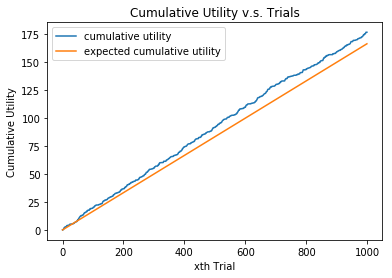

In [20]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 2 (1 other bidder)
def beta4(valuation):
    #Define your bidding function for n = 2 (1 other bidder)
    return valuation
X = [i for i in range(1000)]
Y = simulate_spa(2, beta4, 'uniform', num_trials=1000)
n=2
expected=1/((n+1)*n)
YCE=[expected*i for i in range(1000)]
YE= [Y[i]/i for i in range(1000)]
plt.plot(X, Y,label='cumulative utility')
plt.plot(X,YCE,label='expected cumulative utility')
plt.xlabel('xth Trial')
plt.ylabel('Cumulative Utility')
plt.title('Cumulative Utility v.s. Trials')
plt.legend()
plt.show()

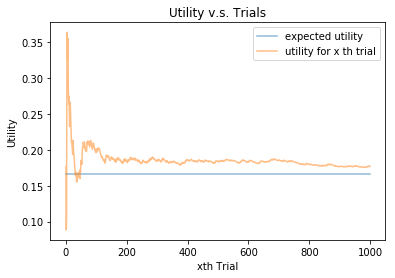

In [21]:
n=2
expected=1/((n+1)*n)
plt.plot(X,[expected]*1000,label='expected utility',alpha=0.5)
plt.plot(X,YE,label='utility for x th trial',alpha=0.5)

plt.xlabel('xth Trial')
plt.ylabel('Utility')
plt.title('Utility v.s. Trials')
plt.legend()
plt.show()

C:\Users\GXC\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


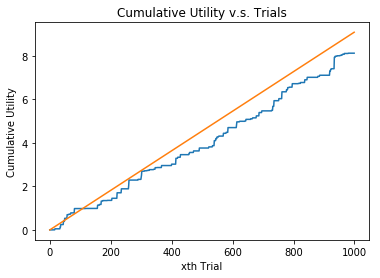

In [22]:
# design your bidding function, plot profit over 1000 rounds, and superimpose expected profit as another line
# for n = 10 (9 other bidders)
def beta5(valuation):
    #Define your bidding function for n = 10 (9 other bidders)
    
    return valuation
X = [i for i in range(1000)]
Y = simulate_spa(10, beta4, 'uniform', num_trials=1000)
YE= [Y[i]/i for i in range(1000)]
n=10
expected=1/((n+1)*n)
YCE=[expected*i for i in range(1000)]
plt.plot(X, Y,label='cumulative utility')
plt.plot(X,YCE,label='expected cumulative utility')
plt.xlabel('xth Trial')
plt.ylabel('Cumulative Utility')
plt.title('Cumulative Utility v.s. Trials')
plt.show()

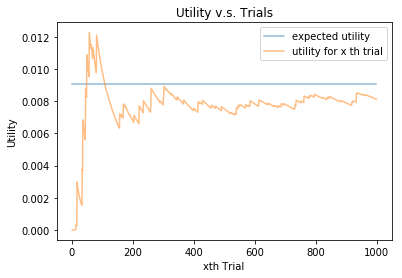

In [23]:
n=10
expected=1/((n+1)*n)
plt.plot(X,[expected]*1000,label='expected utility',alpha=0.5)
plt.plot(X,YE,label='utility for x th trial',alpha=0.5)
plt.xlabel('xth Trial')
plt.ylabel('Utility')
plt.title('Utility v.s. Trials')
plt.legend()
plt.show()

### Q2 (b) Seller Revenue
Now, let's try and see how things look from the other side. Given that all $n$ buyers draw their values uniformly at random from the $(0,1)$ interval, should the seller choose to hold a first price auction, or a second price auction, given that people use optimal bidding functions described above? Show your answer by modifying your simulator for seller revenue (rather than player revenue as we did before) and plotting the revenue from both auctions.

(You can plot $n = 6$ bidders with $100$ trials.)

In [24]:
def beta2(valuation):
    #Define your bidding function for n = 10 (9 other bidders) here
    n=6
    return (n-1)/n*valuation

In [25]:
# Modify your simulator for seller revenue
def simulate_seller(num_players, distribution, is_first_price, num_trials):
    """ 
    num_players (int): The number of bidders in the auction.
    distribution (str): The distribution from which the valuations are drawn.
        This can be either "uniform" or "exponential". See Q1(a) and Q1(b).
    is_first_place (boolean): True for FPA, False for SPA
    num_trials (int): The number of trials for which the simulation will run.

    Returns: profit_timeseries (np.ndarray) from the perspective of a seller
        Entry `i` of this array will contain the total gain of revenue of the
        seller after `i - 1` trials have elapsed (recall that in Python, arrays
        
        are zero-indexed).
    """
    profit_timeseries = np.zeros(num_trials,dtype=float)
    for i in range(num_trials):
        if (distribution == 'uniform')& is_first_price==True:
            all_bids = np.array([beta2(random.uniform(0,1)) for i in range(num_players)])
        elif (distribution == 'uniform')& is_first_price==False:
            all_bids = np.array([beta5(random.uniform(0,1)) for i in range(num_players)])
        elif (distribution == 'exponential')& is_first_price==True:
            all_bids = np.array([beta3(np.random.exponential(0.5)) for i in range(num_players)])
        elif (distribution == 'exponential')& is_first_price==False:
            all_bids = np.array([beta5(np.random.exponential(0.5)) for i in range(num_players)])
        
        all_bids.sort(axis=0)

        if is_first_price:
            win_price = all_bids[-1]
        else:
            win_price = all_bids[-2]
        for j in range (i,num_trials):
            profit_timeseries[j] += win_price
    return profit_timeseries

# FPA and SPA revenue plots

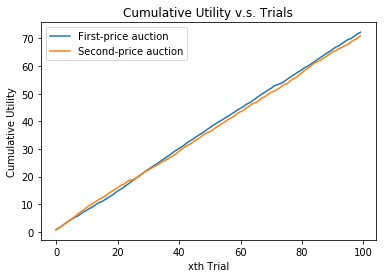

In [26]:
X = [i for i in range(100)]
num_trials=100
Y1 = simulate_seller(6, 'uniform',True, num_trials)
Y2 = simulate_seller(6,'uniform',False, num_trials)
plt.plot(X, Y1,label='First-price auction')
plt.plot(X, Y2,label='Second-price auction')
plt.xlabel('xth Trial')
plt.ylabel('Cumulative Utility')
plt.title('Cumulative Utility v.s. Trials')
plt.legend()
plt.show()


In [27]:
# Should the seller choose to hold a FPA or a SPA? Explain.

### Our solution 
##### In FPA:
In a first price auction, we define the random variable X as the highest valuation, which has PDF $g_{X\left(n\right)}(x)=nx^{n-1}$ when there are n bidders in total.
$$g_{X\left(n\right)}(x)=nx^{n-1}$$

$$E[X]=\int_{0}^{1}{g_{X\left(n\right)}(x)dx=\int_{0}^{1}{{nx}^ndx
=n\int_{0}^{1}{x^ndx}}}
=n\left[\frac{x^{n+1}}{n+1}\right]{1\atop0}
=\frac{n}{n+1}$$

$$\beta\left(x\right)= \frac{n-1}{n}x$$

$$E[\beta\left(x\right)] = E[\frac{n-1}{n}x] = \frac{n-1}{n}E[x] = \frac{n-1}{n}\ × \frac{n}{n+1} =\frac{n-1}{n+1}$$

##### In SPA:
In a second price auction, we define the random variable X as the second highest valuation, which has PDF $h_{X\left(n\right)}\left(x\right)$ when there are n bidders in total.

$$h_{X\left(n\right)}(x)=n\left(n-1\right)f\left(x\right)\left(1-F\left(X\right)\right){F\left(X\right)}^{n-2}=n\left(n-1\right)\left(1-X\right)X^{n-2}$$

$$E\left[X\right]=\int_{0}^{1}xh\left(x,n\right)dx\ =\ \int_{0}^{1}{{xn\left(n-1\right)\left(1-X\right)x}^{n-2}dx}
=n\left(n-1\right)\int_{0}^{1}{x^{n-1}-X^ndx}\ \ =\ \ n\left(n-1\right)\left[\frac{x^n}{n}-\frac{x^{n+1}}{n+1}\right]{1\atop0} =\ \frac{n-1}{n+1}$$

$$\beta\left(X\right)=X$$

$$E[\beta\left(X\right)] = E[X] = \frac{n-1}{n+1}$$

Since the expectation of a seller’s revenue under FPA and SPA are the same, his holding a first price auction or a second price auction is expected to make no difference, given that the bidders use the optimal bidding functions described above.

# Q3) First Price Auction with a Reserve

In this scenario, you are again operating as the $\textbf{seller}$. You want to maximize your revenue selling $k$ identical items over $a$ auctions, $a\geq k$, and thus set a reserve price for each auction. This means that unless the maximum bid in a given auction is above the reserve price you set, the transaction is not completed, and no money or goods exchange hands. If the highest bid is above the reserve price, then the transaction occurs as per usual, with the winner paying what he bid in exchange for the item.

Here is an example of a first price auction with a reserve of $4:  

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>Yes</td>
<td>\$5</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$5.


Whereas, here is an example of that same auction with a reserve of $6:

<table>
<tr>
<th>Advertiser</th>
<th>Bid</th>
<th>Ad shown?</th>
<th>Price paid</th>
</tr>
<tr>
<td>Alice</td>
<td>\$5</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Bob</td>
<td>\$3</td>
<td>No</td>
<td>\$0</td>
</tr>
<tr>
<td>Charlie</td>
<td>\$2</td>
<td>No</td>
<td>\$0</td>
</tr>
</table>
In this example, the seller revenue is \$0.


Using a similar framework to before, we are now going to try to optimize the reserve to maximize the seller's profit.

### Q3 (a) Varying Reserve
Suppose that you have $1$ iPhone that you can try to sell at $100$ different auctions, with one auction occuring each day, where at each auction $n$ bidders bid independently according to a fixed bidding function and a fixed but unknown distribution. If you can change the reserve for each auction, what should your reserve strategy as the seller be?

Below, please write an explanation of your strategy in markdown (no code needed).

**You need give us your reference if you cite some other classical problems/models. Give us your detail derivation for your strategy.**

#### Q3 (a) $\mathcal{Y}\text{our beautiful explanation here}$:

According to Krishna, the optimal reserve price has nothing to do with the numbers of the bidders [1]. And after searching for the optimal model, we find that the problem we faced can be simplified as a problem of choosing a time to sell the item, in order to maximize an expected reward. This is actually an optimal stopping problem [2][3]. 

Before solving the problem, we first define several parameters.  
$r$: the round of auctions  
$x_k$: the true rank of the kth round reserve price  
$M_r$: from the rth round, sell the item when come into the highest bid, which means the seller does not sell the item in the first r-1 rounds  
$S_k$: select the kth round to sell the item.

$$P\left(M_r\right)=\sum_{k=r}^{n}{{(S}_k,x_k=1)=}\sum_{k=r}^{n}{{P(S}_k|x_k=1)P(x_k=1)}$$

Because the probability of each round to be the best choice is equal, thus $$P\left(x_k=1\right)=\frac{1}{n} {P(S}_k\left|x_k=1\right)=\frac{r-1}{k-1}$$

Therefore, $$P\left(M_r\right)=\frac{r-1}{n}\sum_{k=r}^{n}\frac{1}{k-1} r\geq2 $$

Now the problem is that we need to find an optimal r to maximize $P\left(M_r\right)$.
We take $P\left(M_r\right)$ as $f(r)$, in order to find the largest value of f(r), we can first know the change rate of the function.
$$∆f(r)=f\left(r+1\right)-f\left(r\right)=\frac{r}{n}\frac{1}{r}+\cdots+\frac{1}{n-1}-rn\left(\frac{1}{r-1}+\cdots+\frac{1}{n-1}\right)=\frac{1}{n}r\frac{1}{r}+\cdots+\frac{1}{n-1}-r-1\frac{1}{r-1}+\cdots+\frac{1}{n-1}=\frac{1}{n}(-1+\sum_{k=r}^{n-1}\frac{1}{k})$$

When n is constant, $∆f(r)$ is monotonically decreasing with the maximum:
$$∆f(2)=\frac{1}{n}(-1+\sum_{k=r}^{n-1}\frac{1}{k})$$. 

When n is larger than 5, $∆f(r)$ is positive, so we can definitely say that we can find the optimal r^\primein the range of [5, n-1] which makes $∆f(r')$ close to zero. 

Therefore $$\frac{1}{n}(-1+\sum_{k=r\prime}^{n-1}\frac{1}{k})\le0$$ $$\frac{1}{n}\left(-1+\sum_{k=r^\prime-1}^{n-1}\frac{1}{k}\right)>0$$ which means
$$\frac{1}{r\prime}+\cdots+\frac{1}{n-1}\le1<\frac{1}{r\prime-1}+\cdots+\frac{1}{n-1}$$
When we have the value of n, we can get the optimal $r'$.

Because $\int_{1}^{t}{\frac{1}{x}dx=lnt}$and from the figures 

![](Q3_figure_1.jpg) ![](Q3_figure_2.jpg)

We can get that $1+\frac{1}{2}\cdots+\frac{1}{n-1}>\ln{\left(n\right)}$ and $\frac{1}{2}\cdots+\frac{1}{n}<\ln(n). 0<1+\frac{1}{2}\cdots+\frac{1}{n-1}-\ln{\left(n\right)}<1-1n (1)$


When n gets larger, we can approximate $\frac{1}{2}\cdots+\frac{1}{n-1}$ as $\ln{\left(n\right)}$  

Thus, ${r^\prime}+\cdots+\frac{1}{n-1}$ can be estimated as $\ln{\left(n\right)}-\ln{\left(r^\prime\right)}=\ln(\frac{n}{r^\prime})$

From function (1) we can find when n is very large, we can view $\ln(\frac{n}{r^\prime})$ close to 1 and thus $r^\prime\approx\frac{n}{e}$, $P\left(M_{r^\prime}\right)\approx0.36$.

In our case, $r'\approx37$. 

Therefore, our strategy is that: in the $1^{st}$ to the ${37}^{th}$ auctions, we set the reserve price very high so that the iPhone will not be sold. From the ${38}^{th}$ round, we set the reserve price as the highest bid price in the first 37 auctions. Then, in the following auctions, if the highest bid price in a auction is above the our reserve price, we will sell the iPhone to the winner.   


### References

[1] Vijay Krishna, 2010, Auction theory, second edition, US. 

[2] Chow, Y.S.; Robbins, H.; Siegmund, D. (1971). Great Expectations: The Theory of Optimal Stopping. Boston: Houghton Mifflin. 
        
[3] Ferguson, Thomas S. (2007). Optima Stopping and Application. UCLA.

[4] Specoder, the optimal stopping problem, Accessed from http://specoder.is-programmer.com/posts/29993.
